<a href="https://colab.research.google.com/github/snehjn1407/AI-ML-projects/blob/main/creditcardsnehjn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Display information about the dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
import gdown

# File ID from the shareable link
file_id = '1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK'

# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
output = 'creditcard.csv'
gdown.download(download_url, output, quiet=False)

# Load the CSV file into a DataFrame
import pandas as pd
data = pd.read_csv(output)
data.head()  # Display the first few rows of the dataset

# Display number of rows and columns
data.shape
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK
From (redirected): https://drive.google.com/uc?export=download&id=1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK&confirm=t&uuid=91287bf3-8917-4cad-af7e-83fc98ac6d7f
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:00<00:00, 161MB/s]


Number of Rows 284807
Number of Columns 31


In [ ]:
# Standardize the 'Amount' column
# Check the first few rows after transformation
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Drop the 'Time' column
# Check the first few rows after dropping the column
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Drop duplicate rows from the dataset
# Check the new shape of the dataset
data = data.drop_duplicates()
data.shape

(275663, 30)

In [ ]:
# Count the number of fraud (Class=1) and non-fraud (Class=0) cases
data['Class'].value_counts()

,count
Class,
0,275190
1,473


Libraries imported successfully.


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK
From (redirected): https://drive.google.com/uc?export=download&id=1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK&confirm=t&uuid=b0f551f0-fe02-4f56-b489-63abf3d89dce
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:02<00:00, 71.2MB/s]


Download complete.
Dataset loaded successfully.
Original Data Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.79827

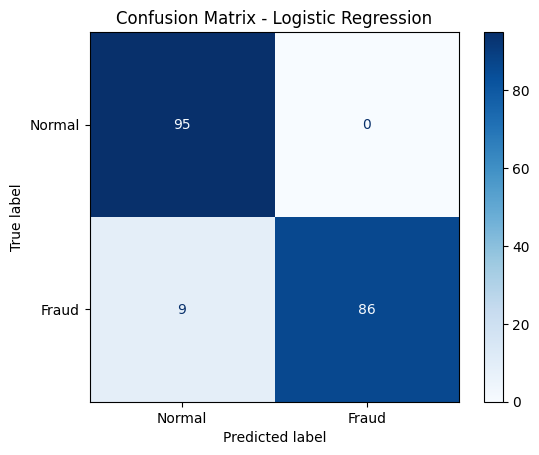


--- Decision Tree Results ---
Accuracy      : 88.95%
Precision     : 0.8558
Recall        : 0.9368
F1 Score      : 0.8945


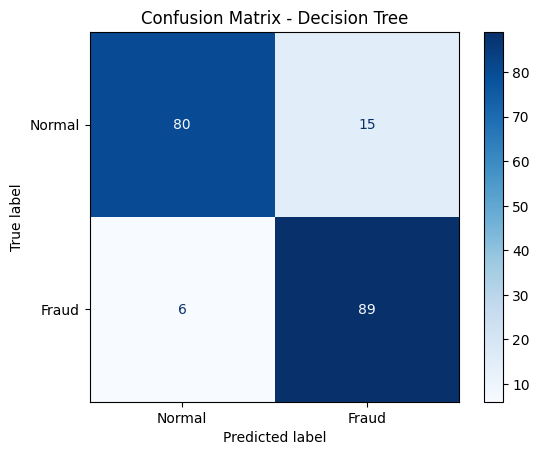


--- Random Forest Results ---
Accuracy      : 94.21%
Precision     : 0.9884
Recall        : 0.8947
F1 Score      : 0.9392


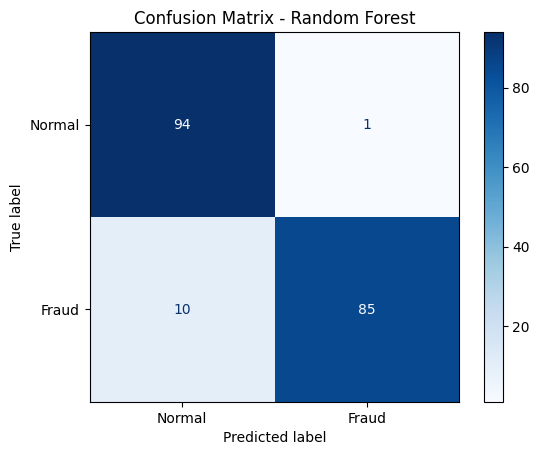


--- SVM Results ---
Accuracy      : 94.21%
Precision     : 0.9884
Recall        : 0.8947
F1 Score      : 0.9392


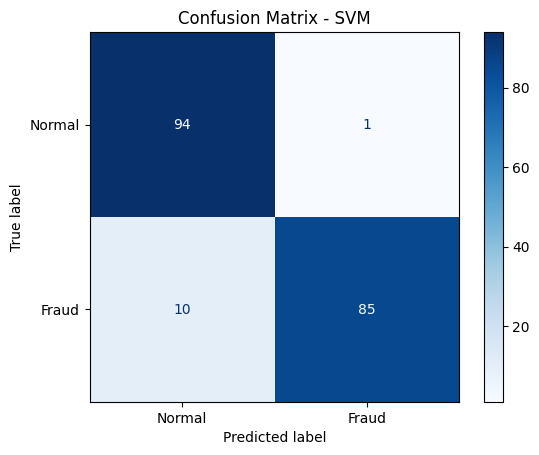


--- XGBoost Results ---
Accuracy      : 94.74%
Precision     : 0.9885
Recall        : 0.9053
F1 Score      : 0.9451


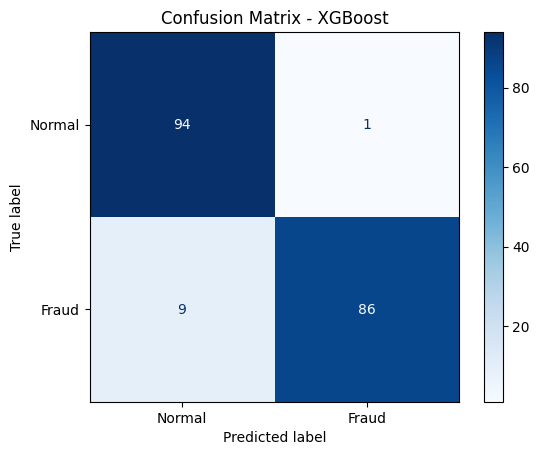


--- Training and Evaluating Stacking Classifier ---
Training Stacking model...
Stacking model trained.

--- Stacking Classifier Results ---
Accuracy      : 95.79%
Precision     : 1.0000
Recall        : 0.9158
F1 Score      : 0.9560


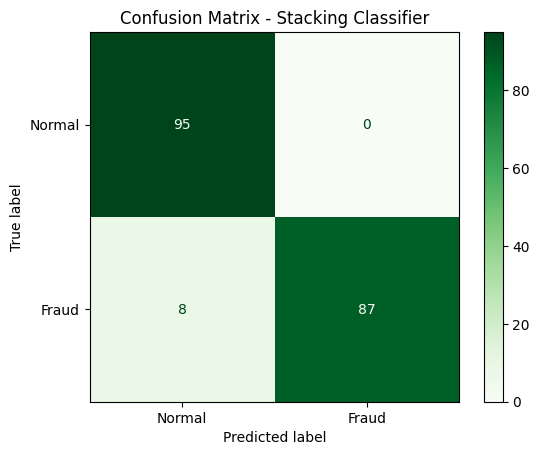


--- Final Model Comparison ---

=== Final Model Comparison Table ===
              Model  Accuracy (%)  Precision   Recall  F1 Score
Stacking Classifier     95.789474   1.000000 0.915789  0.956044
Logistic Regression     95.263158   1.000000 0.905263  0.950276
            XGBoost     94.736842   0.988506 0.905263  0.945055
                SVM     94.210526   0.988372 0.894737  0.939227
      Random Forest     94.210526   0.988372 0.894737  0.939227
      Decision Tree     88.947368   0.855769 0.936842  0.894472

--- Plotting Model Comparison Metrics ---


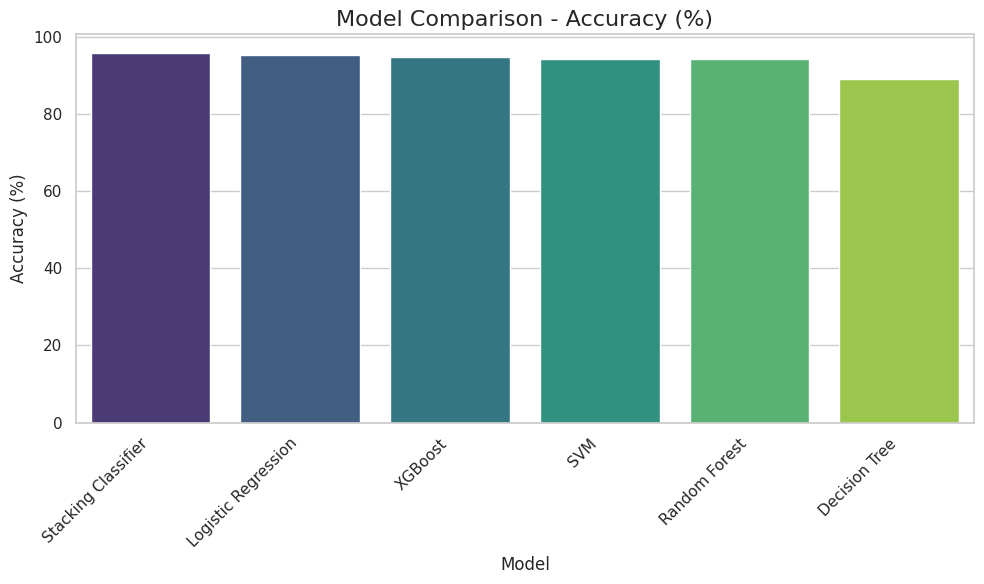

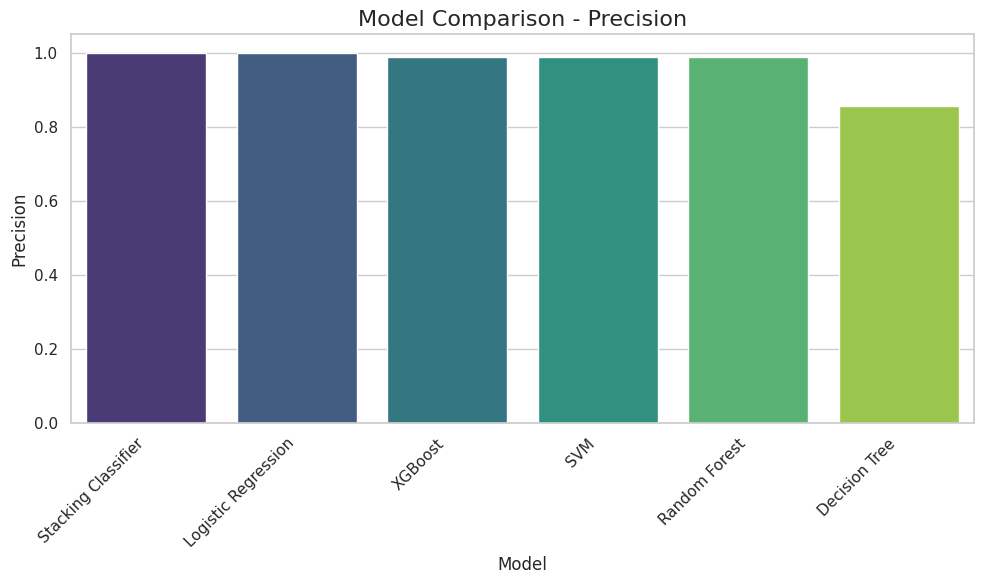

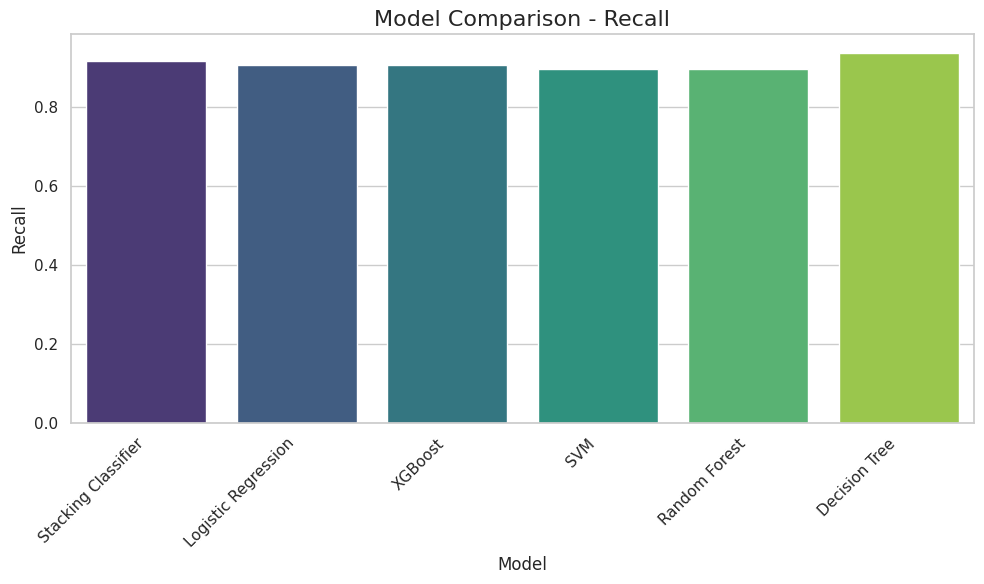

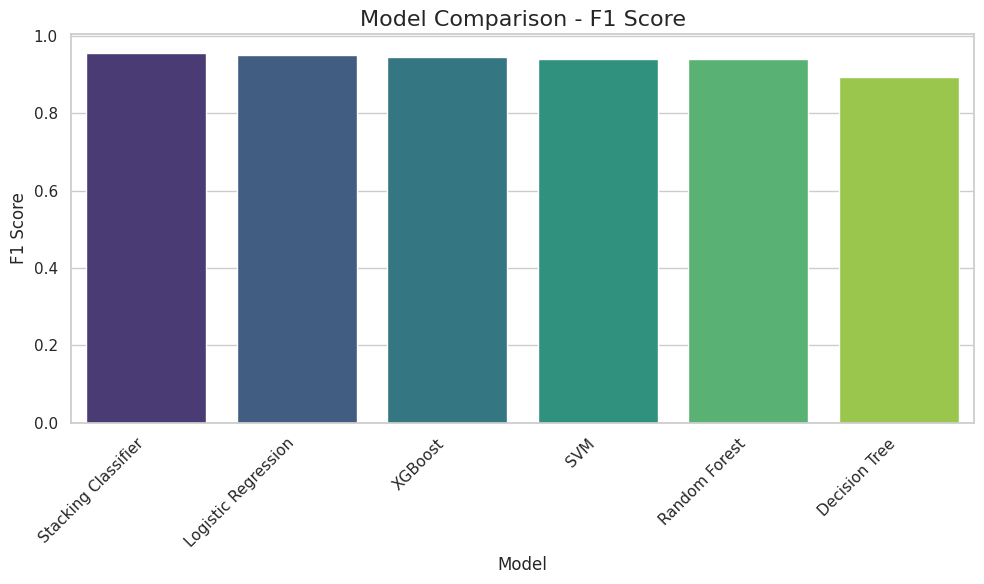


--- Generating ROC Curve Comparison ---


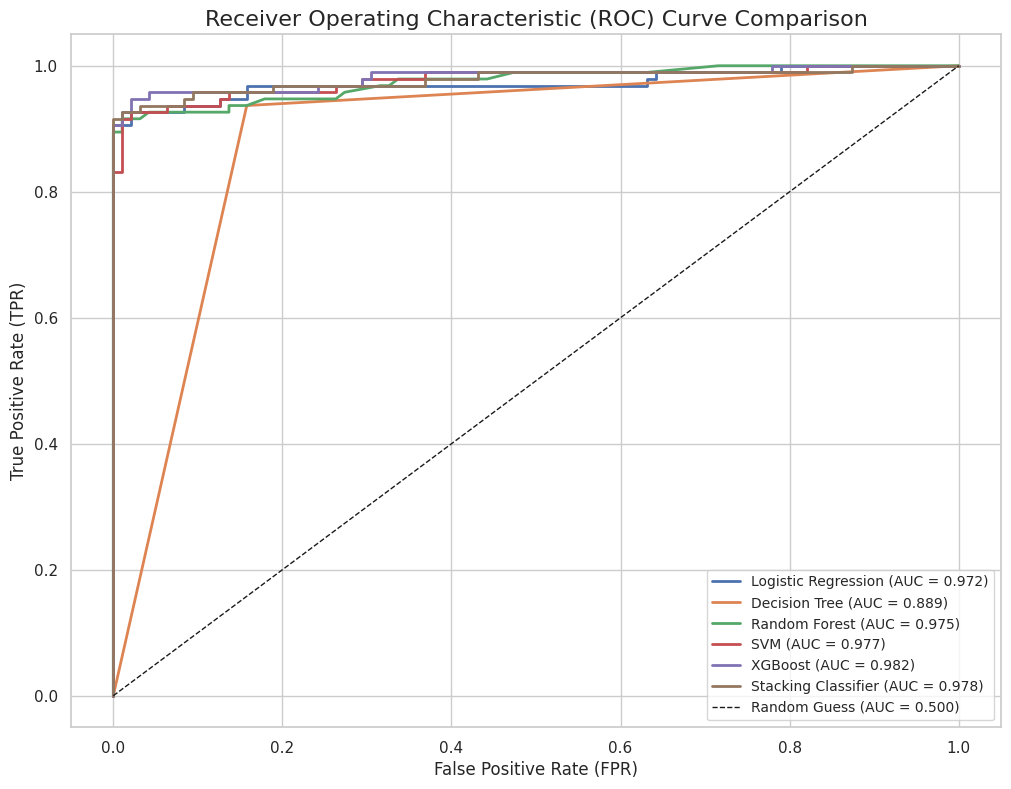


--- Area Under the Curve (AUC) Scores ---
XGBoost             : 0.9818
Stacking Classifier : 0.9781
SVM                 : 0.9771
Random Forest       : 0.9748
Logistic Regression : 0.9723
Decision Tree       : 0.8895

--- Saving Model ---
Model 'Random Forest' saved successfully as credit_card_fraud_model.joblib

Model 'credit_card_fraud_model.joblib' loaded successfully.
Predicting on a dummy sample with 29 features...
Prediction on dummy sample: Normal

--- Script Finished ---


In [ ]:

# -*- coding: utf-8 -*-
"""
Credit Card Fraud Detection - Consolidated Code for Colab
"""

# --------------------------------------------------
# 1. Import Libraries
# --------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc)
import gdown
import joblib
import warnings

# Ignore common warnings (optional, but cleans up output)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

print("Libraries imported successfully.")

# --------------------------------------------------
# 2. Download and Load Data
# --------------------------------------------------
# File ID from the shareable link
file_id = '1fKz85j0A05tQCdPsbm6XtzOzfmGp4jcK'
# Construct the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
# Download the file
output = 'creditcard.csv'
print(f"Downloading dataset to {output}...")
gdown.download(download_url, output, quiet=False)
print("Download complete.")

# Load the CSV file into a DataFrame
data = pd.read_csv(output)
print("Dataset loaded successfully.")
print("Original Data Head:")
print(data.head())
print("\nOriginal Data Shape:")
print(f"Number of Rows: {data.shape[0]}, Number of Columns: {data.shape[1]}")

# --------------------------------------------------
# 3. Preprocessing
# --------------------------------------------------
print("\n--- Starting Preprocessing ---")

# Scale 'Amount' column
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))
print("Scaled 'Amount' column.")

# Drop 'Time' column
data = data.drop(['Time'], axis=1)
print("Dropped 'Time' column.")

# Check for duplicates before removal
initial_rows = data.shape[0]
# Drop duplicate rows
data = data.drop_duplicates()
final_rows = data.shape[0]
print(f"Dropped {initial_rows - final_rows} duplicate rows.")
print(f"Data shape after dropping duplicates: {data.shape}")

# Display class distribution before undersampling
print("\nClass Distribution Before Undersampling:")
print(data['Class'].value_counts())

# --------------------------------------------------
# 4. Handle Class Imbalance (Undersampling)
# --------------------------------------------------
print("\n--- Handling Class Imbalance (Undersampling) ---")
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

print(f"Number of normal transactions: {normal.shape[0]}")
print(f"Number of fraud transactions: {fraud.shape[0]}")

# Create a sample of normal transactions equal to the number of fraud transactions
# Using the count of the fraud class directly makes it more robust if the data changes
fraud_count = fraud.shape[0]
normal_sample = normal.sample(n=fraud_count, random_state=42) # Added random_state for reproducibility
print(f"Sampling {normal_sample.shape[0]} normal transactions.")

# Concatenate the fraud transactions with the normal sample
new_data = pd.concat([normal_sample, fraud], ignore_index=True)
print("\nCreated balanced dataset by undersampling.")
print(f"New balanced dataset shape: {new_data.shape}")

# Verify the new class distribution
print("\nClass Distribution After Undersampling:")
print(new_data['Class'].value_counts())

# --------------------------------------------------
# 5. Prepare Data for Modeling (Split)
# --------------------------------------------------
print("\n--- Splitting Data into Training and Test Sets ---")
X = new_data.drop('Class', axis=1)
y = new_data['Class']

# Split data using stratification to maintain class proportion in splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print("Class distribution in y_test:")
print(y_test.value_counts(normalize=True)) # Check stratification worked

# --------------------------------------------------
# 6. Train and Evaluate Individual Models
# --------------------------------------------------
print("\n--- Training and Evaluating Individual Models ---")

models = {}
predictions = {}
results = []

# --- Logistic Regression ---
print("\nTraining Logistic Regression...")
log = LogisticRegression(random_state=42, max_iter=1000) # Added random_state and increased max_iter
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
models['Logistic Regression'] = log
predictions['Logistic Regression'] = y_pred_log
print("Logistic Regression Trained.")

# --- Decision Tree ---
print("\nTraining Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
models['Decision Tree'] = dt
predictions['Decision Tree'] = y_pred_dt
print("Decision Tree Trained.")

# --- Random Forest ---
print("\nTraining Random Forest...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
models['Random Forest'] = rf
predictions['Random Forest'] = y_pred_rf
print("Random Forest Trained.")

# --- Support Vector Machine (SVM) ---
print("\nTraining Support Vector Machine (SVM)...")
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42) # Ensure probability=True for ROC
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
models['SVM'] = svm_model
predictions['SVM'] = y_pred_svm
print("SVM Trained.")

# --- XGBoost ---
print("\nTraining XGBoost...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
models['XGBoost'] = xgb_model
predictions['XGBoost'] = y_pred_xgb
print("XGBoost Trained.")

# --- Evaluate all individual models ---
print("\n--- Evaluating Individual Models ---")
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy (%)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    print(f"\n--- {name} Results ---")
    print(f"Accuracy      : {accuracy:.2f}%")
    print(f"Precision     : {precision:.4f}")
    print(f"Recall        : {recall:.4f}")
    print(f"F1 Score      : {f1:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fraud'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# --------------------------------------------------
# 7. Train and Evaluate Stacking Classifier
# --------------------------------------------------
print("\n--- Training and Evaluating Stacking Classifier ---")

# Define the base models (can reuse trained models or define new ones)
# It's often better to define them fresh within the StackingClassifier context
base_learners = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)), # Need probability for meta-learner if it uses probabilities
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Define the Stacking Classifier with cross-validation for base learners
# StratifiedKFold is good for classification tasks
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stacking_model = StackingClassifier(estimators=base_learners,
                                    final_estimator=meta_model,
                                    cv=cv_strategy)

# Train the Stacking Classifier
print("Training Stacking model...")
stacking_model.fit(X_train, y_train)
print("Stacking model trained.")

# Predict using the stacking model
y_pred_stack = stacking_model.predict(X_test)
models['Stacking Classifier'] = stacking_model
predictions['Stacking Classifier'] = y_pred_stack

# Evaluate the Stacking model
print("\n--- Stacking Classifier Results ---")
accuracy_stack = accuracy_score(y_test, y_pred_stack) * 100
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
results.append({
    'Model': 'Stacking Classifier',
    'Accuracy (%)': accuracy_stack,
    'Precision': precision_stack,
    'Recall': recall_stack,
    'F1 Score': f1_stack
})
print(f"Accuracy      : {accuracy_stack:.2f}%")
print(f"Precision     : {precision_stack:.4f}")
print(f"Recall        : {recall_stack:.4f}")
print(f"F1 Score      : {f1_stack:.4f}")

# Plot Confusion Matrix for Stacking Classifier
cm_stack = confusion_matrix(y_test, y_pred_stack)
disp_stack = ConfusionMatrixDisplay(confusion_matrix=cm_stack, display_labels=['Normal', 'Fraud'])
disp_stack.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()

# --------------------------------------------------
# 8. Final Model Comparison
# --------------------------------------------------
print("\n--- Final Model Comparison ---")

final_results_df = pd.DataFrame(results)
# Sort by F1 Score (often a good metric for imbalanced datasets)
final_results_df = final_results_df.sort_values(by='F1 Score', ascending=False)

print("\n=== Final Model Comparison Table ===")
# Use to_string to print the full table without truncation
print(final_results_df.to_string(index=False))

# Plotting the metrics comparison
print("\n--- Plotting Model Comparison Metrics ---")
sns.set(style="whitegrid")
metrics_to_plot = ['Accuracy (%)', 'Precision', 'Recall', 'F1 Score']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    # Use the sorted dataframe for consistent plotting order
    sns.barplot(x='Model', y=metric, data=final_results_df, palette='viridis')
    plt.title(f'Model Comparison - {metric}', fontsize=16)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout
    plt.show()


# --------------------------------------------------
# 9. ROC Curve Comparison
# --------------------------------------------------
print("\n--- Generating ROC Curve Comparison ---")

plt.figure(figsize=(12, 9)) # Increased figure size
ax = plt.gca()
auc_scores = {}

# Plot ROC for each model that has predict_proba
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_val = auc(fpr, tpr)
            auc_scores[name] = auc_val
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_val:.3f})', lw=2) # Increased line width
        except Exception as e:
            print(f"Could not generate ROC for {name}: {e}")
    else:
        print(f"Model {name} does not support predict_proba, skipping ROC curve.")

# Plot the baseline (random guess)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)', lw=1)

# Set labels, title, and legend
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

# Print AUC scores separately
print("\n--- Area Under the Curve (AUC) Scores ---")
# Sort AUC scores for clarity
sorted_auc = dict(sorted(auc_scores.items(), key=lambda item: item[1], reverse=True))
for name, auc_val in sorted_auc.items():
    print(f"{name:<20}: {auc_val:.4f}")


# --------------------------------------------------
# 10. Save the Best Performing Model (Example: Random Forest)
# --------------------------------------------------
# You might choose the best model based on F1-score or AUC from the balanced dataset evaluation
# Here, we save the Random Forest model as an example.
print("\n--- Saving Model ---")
best_model_name = 'Random Forest' # Or choose based on results_df or sorted_auc
model_to_save = models.get(best_model_name)

if model_to_save:
    model_filename = "credit_card_fraud_model.joblib"
    joblib.dump(model_to_save, model_filename)
    print(f"Model '{best_model_name}' saved successfully as {model_filename}")

    # Example of loading and predicting (optional)
    loaded_model = joblib.load(model_filename)
    print(f"\nModel '{model_filename}' loaded successfully.")
    # Create a dummy sample matching the number of features (X_test.shape[1])
    num_features = X_test.shape[1]
    dummy_sample = np.ones((1, num_features)) # Example: a row of all ones
    print(f"Predicting on a dummy sample with {num_features} features...")
    prediction = loaded_model.predict(dummy_sample)
    print(f"Prediction on dummy sample: {'Fraud' if prediction[0] == 1 else 'Normal'}")
else:
    print(f"Could not find model named '{best_model_name}' to save.")

print("\n--- Script Finished ---")